## Standard Imports

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler

import yfinance as yf
from google.colab import drive

In [ ]:
!pip install fredapi

import fredapi as fa

## Retrieve Data

### Yahoo Finance

In [ ]:
#Yahoo Finance only US indices
start_date = "1998-01-01"
end_date = "2022-12-31"
ticker_list = ['^VIX', '^SPX', '^TYX']
ETF_data = []
for ticker in ticker_list:
    ETF_data.append(yf.download(ticker, start=start_date, end=end_date)['Adj Close'])
df_data = pd.DataFrame(ETF_data).T
df_data.columns = ticker_list
df_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,^VIX,^SPX,^TYX
Date,,,
1998-01-02,23.420000,975.039978,5.848
1998-01-05,24.360001,977.070007,5.729
1998-01-06,25.660000,966.580017,5.718
1998-01-07,25.070000,964.000000,5.793
1998-01-08,26.010000,956.049988,5.746


In [ ]:
df_data.describe()

,^VIX,^SPX,^TYX
count,6291.000000,6291.000000,6280.000000
mean,20.572779,1820.321653,3.972019
std,8.575268,944.394588,1.263884
min,9.140000,676.530029,0.937000
25%,14.265000,1166.419983,2.955000
50%,18.940001,1395.410034,4.174000
75%,24.370001,2169.109985,4.966250
max,82.690002,4796.560059,6.742000


In [ ]:
df_data.isnull().any(axis=0)

^VIX    False
^SPX    False
^TYX     True
dtype: bool

In [ ]:
df_data[df_data.isnull().any(axis=1)]

,^VIX,^SPX,^TYX
Date,,,
1998-10-12,40.070000,997.710022,NaN
1998-11-11,28.469999,1120.969971,NaN
1999-10-11,20.629999,1335.209961,NaN
1999-11-11,22.070000,1381.459961,NaN
2003-11-11,17.540001,1046.569946,NaN
2005-10-10,15.550000,1187.329956,NaN
2005-11-11,11.630000,1234.719971,NaN
2006-10-09,11.680000,1350.660034,NaN
2010-10-11,18.959999,1165.319946,NaN


### Bloomberg

In [ ]:
# Load the Excel file
drive.mount('/content/drive')
xls = pd.ExcelFile('/content/drive/My Drive/BOA_Capstone/bloomberg_daily.xlsx')

# Load all sheets into a dictionary of DataFrames
dfs = {sheet_name: xls.parse(sheet_name, parse_dates=[0]) for sheet_name in xls.sheet_names}

# Rename the date column in each dataframe to 'date' for consistency
for df_name in dfs:
    dfs[df_name] = dfs[df_name].rename(columns={dfs[df_name].columns[0]: 'date'})

# Perform an outer join on 'date' column
df_final = dfs[xls.sheet_names[0]]
for df_name in xls.sheet_names[1:]:
    df_final = pd.merge(df_final, dfs[df_name], on='date', how='outer')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_final.sort_values(by='date',inplace=True)
df_final.reset_index(drop=True,inplace=True)
df_final.head()

,date,CL1_Comdty,T_rate_1,T_rate_5,T_rate_10,USYC3M10,USYC2M10,US0003M,JPYUSD,GBPUSD,EURUSD,SPGSGC
0,1998-01-02,17.43,5.46,5.63,5.67,41.75,19.5,5.80859,0.007557,1.6450,1.0866,168.4909
1,1998-01-05,16.89,5.35,5.46,5.52,30.35,12.2,5.78125,0.007495,1.6298,1.0776,164.5901
2,1998-01-06,16.91,5.30,5.41,5.49,26.50,5.8,5.71875,0.007453,1.6202,1.0754,164.3572
3,1998-01-07,16.82,5.31,5.45,5.55,43.20,23.8,5.69141,0.007573,1.6246,1.0733,165.7545
4,1998-01-08,16.97,5.20,5.34,5.49,45.90,30.8,5.68750,0.007544,1.6129,1.0784,164.2525


In [ ]:
df_data['date'] = df_data.index

In [ ]:
df_all = pd.merge(df_final,df_data,on='date',how='outer')
df_all.head()

,date,CL1_Comdty,T_rate_1,T_rate_5,T_rate_10,USYC3M10,USYC2M10,US0003M,JPYUSD,GBPUSD,EURUSD,SPGSGC,^VIX,^SPX,^TYX
0,1998-01-02,17.43,5.46,5.63,5.67,41.75,19.5,5.80859,0.007557,1.6450,1.0866,168.4909,23.420000,975.039978,5.848
1,1998-01-05,16.89,5.35,5.46,5.52,30.35,12.2,5.78125,0.007495,1.6298,1.0776,164.5901,24.360001,977.070007,5.729
2,1998-01-06,16.91,5.30,5.41,5.49,26.50,5.8,5.71875,0.007453,1.6202,1.0754,164.3572,25.660000,966.580017,5.718
3,1998-01-07,16.82,5.31,5.45,5.55,43.20,23.8,5.69141,0.007573,1.6246,1.0733,165.7545,25.070000,964.000000,5.793
4,1998-01-08,16.97,5.20,5.34,5.49,45.90,30.8,5.68750,0.007544,1.6129,1.0784,164.2525,26.010000,956.049988,5.746


In [ ]:
df_all.shape

(6521, 15)

In [ ]:
df_all = df_all.set_index('date')
df_all

,CL1_Comdty,T_rate_1,T_rate_5,T_rate_10,USYC3M10,USYC2M10,US0003M,JPYUSD,GBPUSD,EURUSD,SPGSGC,^VIX,^SPX,^TYX
date,,,,,,,,,,,,,,
1998-01-02,17.43,5.46,5.63,5.67,41.750,19.500,5.80859,0.007557,1.6450,1.0866,168.4909,23.420000,975.039978,5.848
1998-01-05,16.89,5.35,5.46,5.52,30.350,12.200,5.78125,0.007495,1.6298,1.0776,164.5901,24.360001,977.070007,5.729
1998-01-06,16.91,5.30,5.41,5.49,26.500,5.800,5.71875,0.007453,1.6202,1.0754,164.3572,25.660000,966.580017,5.718
1998-01-07,16.82,5.31,5.45,5.55,43.200,23.800,5.69141,0.007573,1.6246,1.0733,165.7545,25.070000,964.000000,5.793
1998-01-08,16.97,5.20,5.34,5.49,45.900,30.800,5.68750,0.007544,1.6129,1.0784,164.2525,26.010000,956.049988,5.746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,NaN,NaN,NaN,NaN,-58.279,-57.818,NaN,0.007526,1.2062,1.0637,NaN,NaN,NaN,NaN
2022-12-27,79.53,4.75,3.94,3.84,-48.057,-53.945,NaN,0.007491,1.2025,1.0640,1061.4230,21.650000,3829.250000,3.944
2022-12-28,78.96,4.71,3.97,3.88,-56.639,-47.469,4.72986,0.007436,1.2018,1.0612,1057.1730,22.139999,3783.219971,3.974


##Train Test Split

In [ ]:

#train: 19980101 - 20181231
#test: 20190101 - 20221231

X_train = df_all.loc[:'20181231',:]
X_test = df_all.loc['20190101':,:]


## Data Cleaning

In [ ]:
# #Standardize
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_normal = scaler.fit_transform(df)
# df_n = pd.DataFrame(df_normal, index = df.index, columns= df.columns)
# df_n.head()

In [ ]:
#Fill null data填充日度缺失值 (改)
X_train.fillna(method='ffill',inplace=True)
#X_train.interpolate(method = 'time', inplace = True)
X_train.head()

<ipython-input-110-1b8e5760075c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(method='ffill',inplace=True)


,CL1_Comdty,T_rate_1,T_rate_5,T_rate_10,USYC3M10,USYC2M10,US0003M,JPYUSD,GBPUSD,EURUSD,SPGSGC,^VIX,^SPX,^TYX
date,,,,,,,,,,,,,,
1998-01-02,17.43,5.46,5.63,5.67,41.75,19.5,5.80859,0.007557,1.6450,1.0866,168.4909,23.420000,975.039978,5.848
1998-01-05,16.89,5.35,5.46,5.52,30.35,12.2,5.78125,0.007495,1.6298,1.0776,164.5901,24.360001,977.070007,5.729
1998-01-06,16.91,5.30,5.41,5.49,26.50,5.8,5.71875,0.007453,1.6202,1.0754,164.3572,25.660000,966.580017,5.718
1998-01-07,16.82,5.31,5.45,5.55,43.20,23.8,5.69141,0.007573,1.6246,1.0733,165.7545,25.070000,964.000000,5.793
1998-01-08,16.97,5.20,5.34,5.49,45.90,30.8,5.68750,0.007544,1.6129,1.0784,164.2525,26.010000,956.049988,5.746


In [ ]:
X_train.isnull().any(axis=0)

CL1_Comdty    False
T_rate_1      False
T_rate_5      False
T_rate_10     False
USYC3M10      False
USYC2M10      False
US0003M       False
JPYUSD        False
GBPUSD        False
EURUSD        False
SPGSGC        False
^VIX          False
^SPX          False
^TYX          False
dtype: bool

### Add Technical Indicator and Change to Return

In [ ]:
#Price - moving average
def get_ma(df, n_day):
  return df.rolling(n_day).mean()

#Volatility - rolling
def get_vol(df, window_size):
  return df.rolling(window_size).std()*(252**0.5) #here, window_size should match volatility

#RSI
def get_rsi(ret, lookback):
  up = []
  down = []
  for i in range(len(ret)):
      if ret[i] < 0:
          up.append(0)
          down.append(ret[i])
      else:
          up.append(ret[i])
          down.append(0)
  up_series = pd.Series(up)
  down_series = pd.Series(down).abs()
  up_avg = up_series.rolling(lookback).mean()
  down_avg = down_series.rolling(lookback).mean()
  rsi = 100 * (1 - down_avg/(down_avg +up_avg))
  rsi_df = pd.DataFrame(rsi).rename(columns = {0: ret.name}).set_index(ret.index)
  return rsi_df

#return
def get_return(df):
  return df.pct_change()

#log return
def get_logret(df):
  return np.log(df).diff()

##standardize
def get_stand(X_train):
  scaler = StandardScaler()
  df_normal = scaler.fit_transform(X_train)
  df_n = pd.DataFrame(df_normal, index = X_train.index, columns= X_train.columns)
  return df_n

### Previous Attempt

In [ ]:
X_train['SMA10'] = get_ma(X_train['^SPX'],10)
X_train['SMA50'] = get_ma(X_train['^SPX'], 50)
# drop nan
X_train.dropna(inplace=True)
X_train['Vol50'] = get_vol(X_train['^SPX'], 50)
# drop nan
X_train.dropna(inplace=True)
X_train.head()

X_train['^SPX'] = get_return(X_train['^SPX'])
# X_train['CL1_Comdty'] = get_return(X_train['CL1_Comdty'])

#变成return了drop Nan
X_train[np.isinf(X_train)] = np.nan
X_train.dropna(inplace=True)
X_train.head()
#最后把留下的column再合并成一个X_train
#在这一步 一起删nan

<ipython-input-114-712d8a9ef7c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['SMA10'] = get_ma(X_train['^SPX'],10)
<ipython-input-114-712d8a9ef7c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['SMA50'] = get_ma(X_train['^SPX'], 50)
<ipython-input-114-712d8a9ef7c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,CL1_Comdty,T_rate_1,T_rate_5,T_rate_10,USYC3M10,USYC2M10,US0003M,JPYUSD,GBPUSD,EURUSD,SPGSGC,^VIX,^SPX,^TYX,SMA10,SMA50,Vol50
date,,,,,,,,,,,,,,,,,
1998-05-21,12.96,5.47,5.66,5.65,44.15,3.20,5.69922,0.007409,1.6292,1.1135,176.8165,19.379999,-0.003950,5.920,1112.457007,1106.949207,216.437849
1998-05-22,12.96,5.45,5.65,5.64,42.70,1.70,5.69141,0.007355,1.6279,1.1137,176.1179,18.990000,-0.003741,5.896,1112.690002,1107.786406,197.912595
1998-05-25,12.96,5.45,5.65,5.64,53.35,6.25,5.69141,0.007301,1.6290,1.1137,176.1179,18.990000,0.000000,5.896,1113.072998,1108.410405,186.880218
1998-05-26,14.82,5.45,5.60,5.59,48.15,-0.55,5.69141,0.007282,1.6353,1.1047,173.5562,22.070000,-0.014814,5.845,1110.895996,1108.681807,178.744666
1998-05-27,14.99,5.41,5.57,5.56,53.20,3.10,5.68750,0.007276,1.6313,1.0989,172.4500,22.590000,-0.001636,5.824,1108.232996,1108.816006,174.865729


###Heatmap

In [ ]:
X_train.corr()

,CL1_Comdty,T_rate_1,T_rate_5,T_rate_10,USYC3M10,USYC2M10,US0003M,JPYUSD,GBPUSD,EURUSD,SPGSGC,^VIX,^SPX,^TYX,SMA10,SMA50,Vol50
CL1_Comdty,1.000000,-0.475959,-0.553372,-0.508474,0.214870,0.345380,-0.416290,0.623087,0.273230,0.801987,0.727262,-0.223128,0.002853,-0.459843,0.158025,0.153808,-0.075274
T_rate_1,-0.475959,1.000000,0.944451,0.859019,-0.749802,-0.819678,0.982598,-0.521227,0.302408,-0.397427,-0.733173,0.017063,-0.011535,0.730093,-0.167297,-0.162432,-0.070026
T_rate_5,-0.553372,0.944451,1.000000,0.970407,-0.501857,-0.618023,0.906543,-0.564550,0.300898,-0.450352,-0.858694,0.084777,-0.010006,0.882980,-0.308767,-0.304456,-0.103807
T_rate_10,-0.508474,0.859019,0.970407,1.000000,-0.318800,-0.423471,0.823506,-0.475243,0.357540,-0.385774,-0.877690,0.168448,-0.008870,0.967112,-0.475425,-0.471429,-0.123041
USYC3M10,0.214870,-0.749802,-0.501857,-0.318800,1.000000,0.946577,-0.768336,0.329692,-0.109056,0.247856,0.231723,0.178862,0.009377,-0.139933,-0.255073,-0.257569,-0.007139
USYC2M10,0.345380,-0.819678,-0.618023,-0.423471,0.946577,1.000000,-0.812948,0.438504,-0.070963,0.348026,0.348895,0.178070,0.008183,-0.219485,-0.272800,-0.275701,-0.012125
US0003M,-0.416290,0.982598,0.906543,0.823506,-0.768336,-0.812948,1.000000,-0.478638,0.329955,-0.333577,-0.693563,0.105830,-0.015814,0.694942,-0.181913,-0.173104,0.000168
JPYUSD,0.623087,-0.521227,-0.564550,-0.475243,0.329692,0.438504,-0.478638,1.000000,-0.031491,0.545718,0.675006,0.100496,0.007818,-0.362324,-0.136322,-0.142791,0.007174
GBPUSD,0.273230,0.302408,0.300898,0.357540,-0.109056,-0.070963,0.329955,-0.031491,1.000000,0.541721,-0.283048,-0.068520,-0.001652,0.389512,-0.471882,-0.475289,-0.294716
EURUSD,0.801987,-0.397427,-0.450352,-0.385774,0.247856,0.348026,-0.333577,0.545718,0.541721,1.000000,0.524851,-0.082031,0.014615,-0.325227,-0.063703,-0.072278,-0.098877


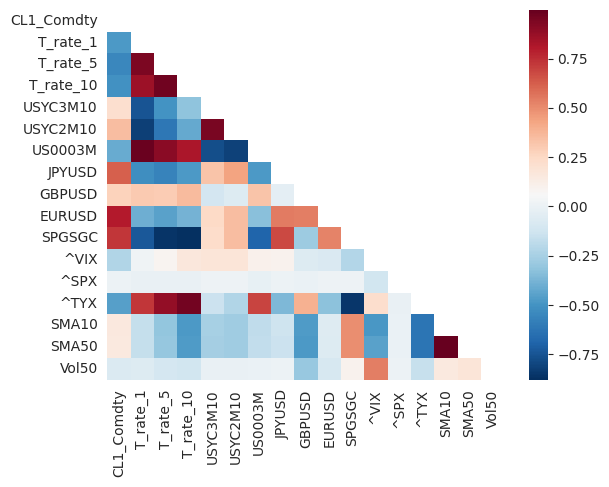

In [ ]:
mask = np.zeros_like(X_train.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  sns.heatmap(data = X_train.corr(), mask = mask, cmap = 'RdBu_r')

### Principal Component Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_normal = scaler.fit_transform(X_train)
df_n = pd.DataFrame(df_normal, index = X_train.index, columns= X_train.columns)
df_n

,CL1_Comdty,T_rate_1,T_rate_5,T_rate_10,USYC3M10,USYC2M10,US0003M,JPYUSD,GBPUSD,EURUSD,SPGSGC,^VIX,^SPX,^TYX,SMA10,SMA50,Vol50
date,,,,,,,,,,,,,,,,,
1998-05-21,-1.598816,1.718418,1.671135,1.542245,-1.172082,-1.361645,1.620673,-1.508336,0.120247,-0.547766,-1.177359,-0.091901,-0.350335,1.540945,-0.747461,-0.755805,-1.157329
1998-05-22,-1.598816,1.708179,1.664807,1.534537,-1.184937,-1.377992,1.616938,-1.547837,0.113465,-0.546566,-1.179882,-0.137525,-0.332810,1.518700,-0.746991,-0.754095,-1.223169
1998-05-25,-1.598816,1.708179,1.664807,1.534537,-1.090518,-1.328407,1.616938,-1.587338,0.119204,-0.546566,-1.179882,-0.137525,-0.018556,1.518700,-0.746217,-0.752820,-1.262379
1998-05-26,-1.533582,1.708179,1.633167,1.495993,-1.136619,-1.402512,1.616938,-1.601237,0.152074,-0.600569,-1.189132,0.222783,-1.262879,1.471429,-0.750614,-0.752265,-1.291293
1998-05-27,-1.527620,1.687700,1.614182,1.472867,-1.091848,-1.362735,1.615068,-1.605626,0.131204,-0.635372,-1.193126,0.283614,-0.155996,1.451965,-0.755993,-0.751991,-1.305079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,-0.561745,0.254198,-0.277936,-0.701004,-1.272362,-1.202787,0.240366,-0.296238,-1.766915,-0.393557,0.857895,1.860543,-0.018556,-1.162763,2.072748,2.442771,4.079607
2018-12-26,-0.432331,0.254198,-0.220983,-0.647043,-1.228698,-1.190734,0.240366,-0.359147,-1.788829,-0.416959,0.860418,1.198420,4.147281,-1.121053,2.035710,2.428815,4.191117
2018-12-27,-0.488796,0.238839,-0.265280,-0.677878,-1.246944,-1.176284,0.235373,-0.336470,-1.783089,-0.370756,0.877447,1.145778,0.700703,-1.137737,2.003046,2.417374,4.291089


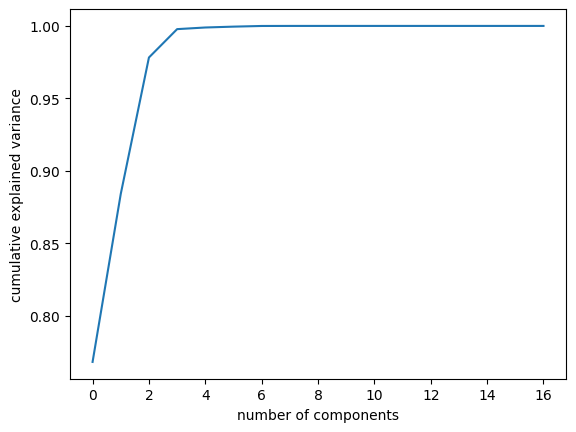

In [ ]:
from sklearn.decomposition import PCA
#Choosing the number of components
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('/content/drive/My Drive/BOA_Capstone/pca', format='png')

In [ ]:
#解释99%的变量
n_comp = sum(np.cumsum(pca.explained_variance_ratio_)<0.99)
n_comp

3

In [ ]:
#n_comp features needed
pca = PCA(n_components= n_comp)
df_pca = pd.DataFrame(pca.fit_transform(X_train)).add_prefix('Component_')
df_pca

,Component_0,Component_1,Component_2
0,-595.727875,-300.845791,-248.685162
1,-596.479318,-319.425684,-248.851854
2,-597.177900,-329.951401,-244.278311
3,-599.277815,-338.288433,-248.699506
4,-601.866688,-341.678629,-246.881096
...,...,...,...
5373,1675.344175,1011.491804,-215.861523
5374,1660.426203,1044.603560,-212.601675
5375,1648.640279,1074.359947,-208.047522
5376,1639.172825,1100.293196,-207.389075


In [ ]:
#使用PCA来获取每个特征对主成分的贡献
# 取出特征列并转换成一个 NumPy 数组，供 PCA 使用
X = X_train.values

# 初始化 PCA 对象，n_components 设置为 1 表示只保留第一个主成分
pca = PCA(n_components=2)

# 在数据上拟合 PCA 模型
pca.fit(X)

# 查看每个特征对第一个主成分的贡献（权重）
first_principal_component_contributions = pd.DataFrame(pca.components_, columns=X_train.columns)

print(first_principal_component_contributions)

   CL1_Comdty  T_rate_1  T_rate_5  T_rate_10  USYC3M10  USYC2M10   US0003M  \
0    0.008159 -0.000581 -0.000799  -0.000951 -0.036937 -0.030979 -0.000641   
1   -0.007290 -0.000608 -0.000512  -0.000324  0.033480  0.028580 -0.000082   

         JPYUSD    GBPUSD    EURUSD    SPGSGC      ^VIX          ^SPX  \
0 -1.518640e-07 -0.000129 -0.000006  0.215170 -0.005337 -7.927221e-08   
1  3.817725e-07 -0.000145 -0.000033  0.046928  0.019897  2.511561e-07   

       ^TYX     SMA10     SMA50     Vol50  
0 -0.001006  0.691279  0.683665  0.077555  
1 -0.000249 -0.088686 -0.034415  0.993157  


## HMM - Detect Regimes based on Price Return MA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install hmmlearn
from hmmlearn import hmm

In [ ]:
# Price Return MA dataframe
df_all = df_all.rename(columns = {'CL1_Comdty':'Crude_Oil', 'SPGSGC':'Gold', '^SPX':'SP500', '^RUA':'Russell3000', '^TYX':"T30"})
#df_price = df_all[['Crude_Oil', 'Gold', 'SP500', 'T30']]
df_price = df_all.drop(columns = ['^VIX'])

# return_annual, rolling window = 252 days
for col in df_price.columns:
  df_price[col] = df_price[col].pct_change().rolling(252).median() # use median to make it more robust -> better than mean
df_price.dropna(inplace = True)

# add plot-target
df_price['plot'] = df_all['SP500']
df_price.dropna(inplace=True)

df_price.tail()

,Crude_Oil,T_rate_1,T_rate_5,T_rate_10,USYC3M10,USYC2M10,US0003M,JPYUSD,GBPUSD,EURUSD,Gold,SP500,T30,plot
date,,,,,,,,,,,,,,
2022-12-23,0.002004,0.003053,0.003217,0.003300,-0.002336,0.0,0.007825,-0.001024,-0.000316,-0.000223,0.0,-0.001267,0.001714,3844.820068
2022-12-27,0.001266,0.003053,0.003120,0.003009,-0.002593,0.0,0.007615,-0.001031,-0.000316,-0.000143,0.0,-0.001267,0.001559,3829.250000
2022-12-28,0.001266,0.002948,0.003120,0.003009,-0.002404,0.0,0.007526,-0.001038,-0.000316,-0.000143,0.0,-0.001267,0.001714,3783.219971
2022-12-29,0.000624,0.002948,0.003120,0.003009,-0.002088,0.0,0.007376,-0.001038,-0.000316,-0.000143,0.0,-0.001267,0.001714,3849.280029
2022-12-30,0.000624,0.002948,0.003217,0.003300,-0.002404,0.0,0.007376,-0.001038,-0.000316,-0.000143,0.0,-0.001299,0.001975,3839.500000


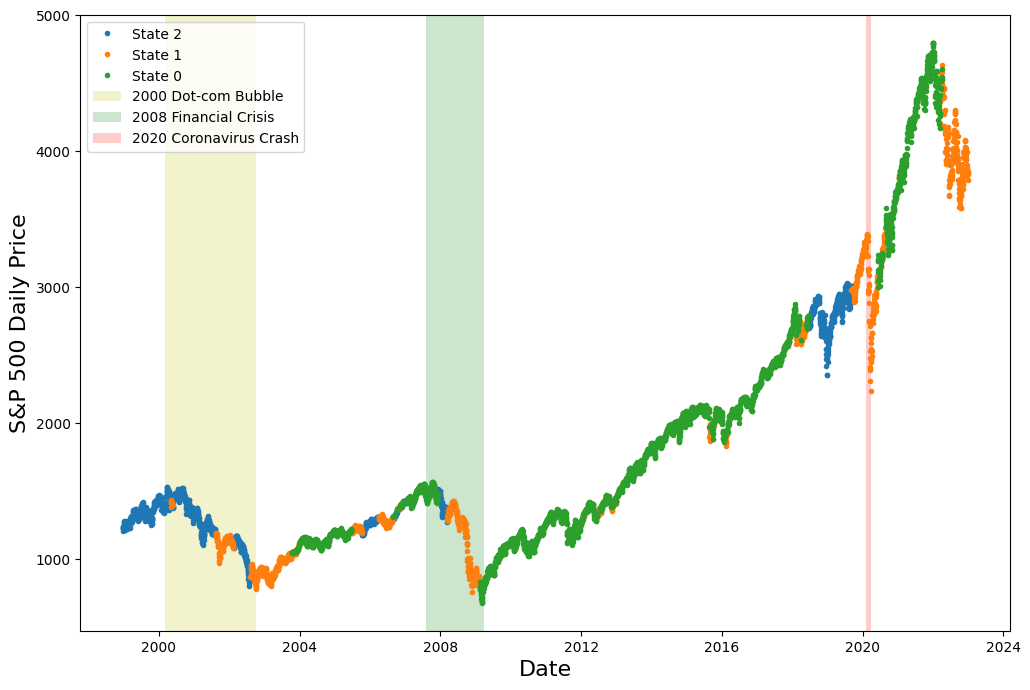

In [ ]:
X = df_price.drop(columns = ['plot']).to_numpy()

# HMM model with Price Return df
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100, random_state=1)
#model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
model = model.fit(X)
predict = model.predict(X)
states = pd.unique(predict)

# reset index
df_price.reset_index(inplace = True)

# plot
plt.figure(figsize = (12, 8))
for state in states:
    want = (predict == state)
    x = df_price['date'].iloc[want]
    y = df_price['plot'].iloc[want]
    plt.plot(x, y, '.', label=f'State {state}')

plt.axvspan(xmin='2000-03', xmax='2002-10', facecolor="y", alpha=0.2, label='2000 Dot-com Bubble')
plt.axvspan(xmin='2007-08', xmax='2009-04', facecolor="g", alpha=0.2, label='2008 Financial Crisis')
plt.axvspan(xmin='2020-02', xmax='2020-04', facecolor="r", alpha=0.2, label='2020 Coronavirus Crash')

plt.savefig('/content/drive/My Drive/BOA_Capstone/1.png')

plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('S&P 500 Daily Price', fontsize=16)
plt.show()

## Backtest: Portfolio Optimization - regime detected by PRICE RETURN

In [ ]:
# retrieve portfolio assets from Yahoo Finance
start_date = "2019-01-01"
end_date = "2022-12-31"
ticker_list = ['MSCI', 'EEM', 'GOVT', 'LQD', 'HYG', 'GLD', 'WTI', 'DJCI']
assets = []

for ticker in ticker_list:
    assets.append(yf.download(ticker, start=start_date, end=end_date)['Adj Close'])

df_p = pd.DataFrame(assets).T
df_p.columns = ticker_list

# turn the daily_price into daily_return
df_p = df_p.pct_change().dropna()

df_p.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MSCI,EEM,GOVT,LQD,HYG,GLD,WTI,DJCI
Date,,,,,,,,
2019-01-03,-0.038111,-0.018131,0.005634,0.000442,0.000494,0.009066,-0.013453,0.007540
2019-01-04,0.037215,0.032250,-0.005202,-0.000618,0.016784,-0.008086,0.120454,0.011225
2019-01-07,0.004639,0.002268,-0.002011,0.000088,0.009710,0.003458,0.050710,0.003756
2019-01-08,0.020776,0.003771,-0.002015,0.002209,0.006491,-0.002708,0.011583,0.005637
2019-01-09,0.009778,0.017781,0.000000,0.003792,0.001194,0.006418,0.041985,0.013026


In [ ]:
# incorporate 'state' column into the dataframe
df_price['state'] = np.nan
non_nan_rows = df_price.dropna().index
mask_non_nan = ~df_price['plot'].isna()
df_price.loc[mask_non_nan, 'state'] = predict

df_price = df_price.set_index('date')
df_price.head()

<ipython-input-140-239b61036e38>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_price.loc[mask_non_nan, 'state'] = predict


,Crude_Oil,T_rate_1,T_rate_5,T_rate_10,USYC3M10,USYC2M10,US0003M,JPYUSD,GBPUSD,EURUSD,Gold,SP500,T30,plot,state
date,,,,,,,,,,,,,,,
1998-12-22,-0.000670,0.0,0.0,0.0,-0.010832,-0.082217,0.0,-0.000764,-0.000362,0.0,-0.000691,0.001145,0.0,1203.569946,2
1998-12-23,-0.000309,0.0,0.0,0.0,-0.007602,-0.073074,0.0,-0.000724,-0.000362,0.0,-0.000691,0.001145,0.0,1228.540039,2
1998-12-24,-0.000670,0.0,0.0,0.0,-0.003521,-0.066041,0.0,-0.000724,-0.000362,0.0,-0.000691,0.001145,0.0,1226.270020,2
1998-12-25,-0.000309,0.0,0.0,0.0,-0.003521,-0.066041,0.0,-0.000764,-0.000394,0.0,-0.000691,0.001145,0.0,1226.270020,2
1998-12-28,-0.000309,0.0,0.0,0.0,-0.007602,-0.073074,0.0,-0.000724,-0.000362,0.0,-0.000682,0.001145,0.0,1225.489990,2


In [ ]:
# merge portfolio dataframe and regime states, drop null values
df = df_p.merge(df_price['state'], left_index=True, right_index=True, how='left').dropna()

pd.concat([df.head(), df.tail()])

,MSCI,EEM,GOVT,LQD,HYG,GLD,WTI,DJCI,state
Date,,,,,,,,,
2019-01-03,-0.038111,-0.018131,0.005634,0.000442,0.000494,0.009066,-0.013453,0.007540,2
2019-01-04,0.037215,0.032250,-0.005202,-0.000618,0.016784,-0.008086,0.120454,0.011225,2
2019-01-07,0.004639,0.002268,-0.002011,0.000088,0.009710,0.003458,0.050710,0.003756,2
2019-01-08,0.020776,0.003771,-0.002015,0.002209,0.006491,-0.002708,0.011583,0.005637,2
2019-01-09,0.009778,0.017781,0.000000,0.003792,0.001194,0.006418,0.041985,0.013026,2
2022-12-23,0.003245,-0.001321,-0.004350,-0.003073,0.002561,0.002998,0.039927,0.000000,1
2022-12-27,-0.007309,0.014815,-0.005679,-0.012890,-0.010351,0.008430,0.010471,0.000000,1
2022-12-28,-0.013010,-0.014599,-0.001318,-0.003123,-0.013448,-0.004506,-0.056995,0.000000,1
2022-12-29,0.038465,0.016667,0.003080,0.007119,0.012942,0.005598,0.023810,0.000000,1


             MSCI       EEM      GOVT       LQD       HYG       GLD       WTI  \
state                                                                           
Bear     0.001096 -0.000053 -0.000003 -0.000059 -0.000101  0.000293  0.000100   
Bull     0.001261  0.000290 -0.000197 -0.000104  0.000129  0.000219  0.003213   
Neutral  0.002791  0.000390  0.000384  0.000775  0.000618  0.000954  0.001128   

             DJCI  
state              
Bear    -0.000301  
Bull     0.000192  
Neutral  0.000265  


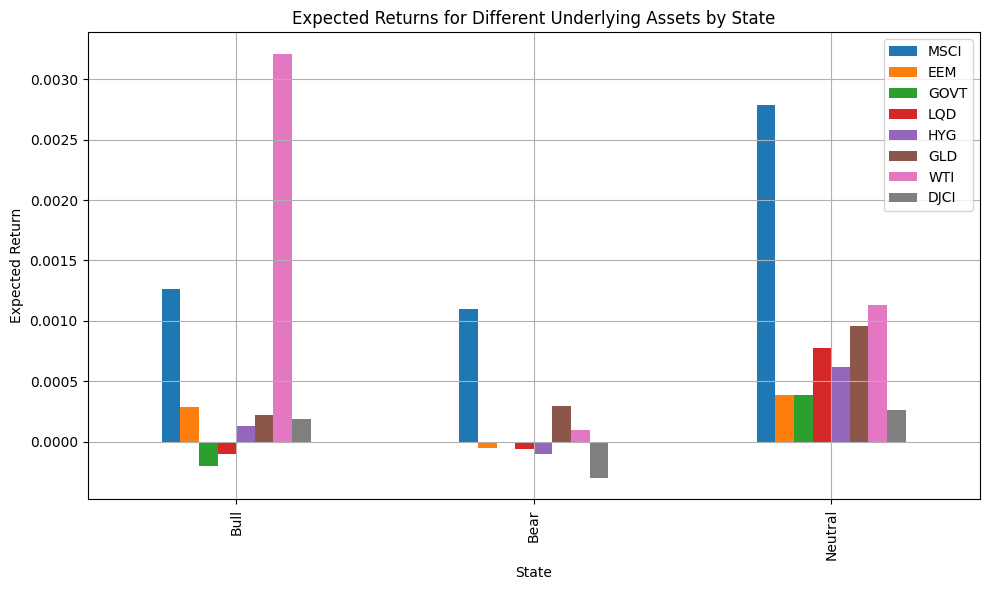

In [ ]:
# Filter for states 0 and 1 (if necessary)
filtered_data = df[df['state'].isin([0, 1, 2])]

# Rename the states in the DataFrame
filtered_data = filtered_data.replace({'state': {0: 'Bull', 1: 'Bear', 2: 'Neutral'}})

# Group by 'state' and compute the mean for each group
expected_returns = filtered_data.groupby('state').mean()

print(expected_returns)

# Plot
ticker_list = ['MSCI', 'EEM', 'GOVT', 'LQD', 'HYG', 'GLD', 'WTI', 'DJCI']

expected_returns_demo = pd.DataFrame({ticker: expected_returns[ticker] for ticker in ticker_list}, index=['Bull', 'Bear', 'Neutral'])

expected_returns_demo.plot(kind='bar', figsize=(10, 6))
plt.title('Expected Returns for Different Underlying Assets by State')
plt.xlabel('State')
plt.ylabel('Expected Return')
plt.grid()
plt.tight_layout()

plt.savefig('/content/drive/My Drive/BOA_Capstone/2', format='png')
plt.show()

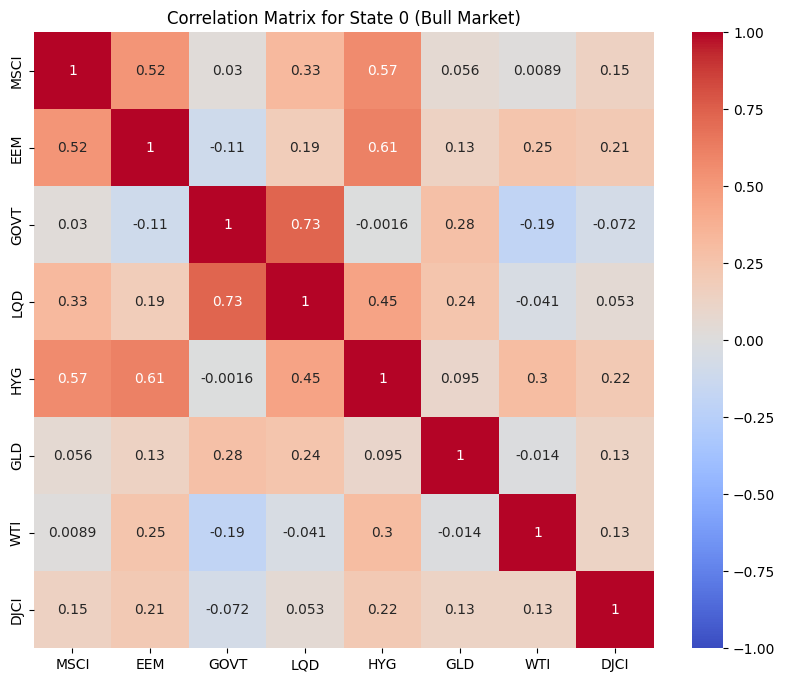

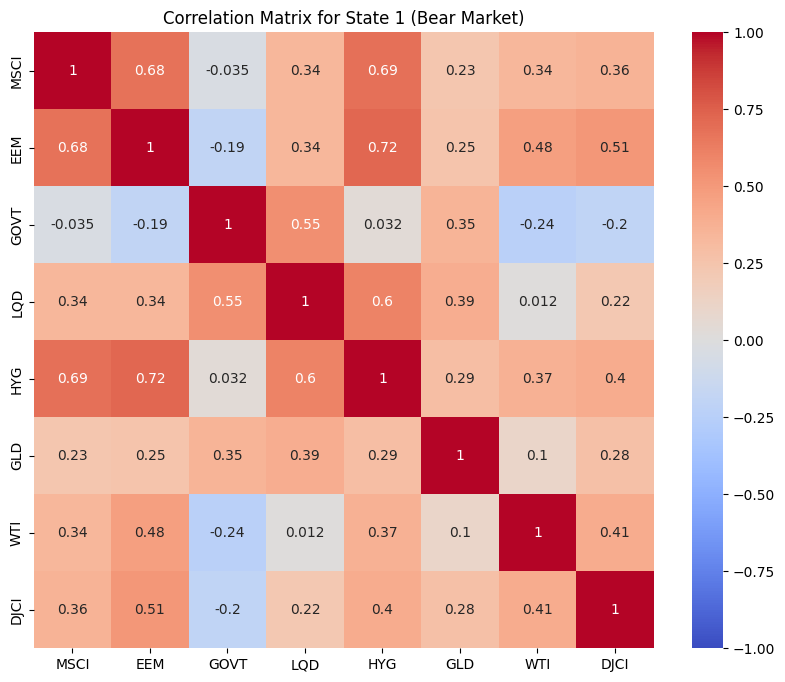

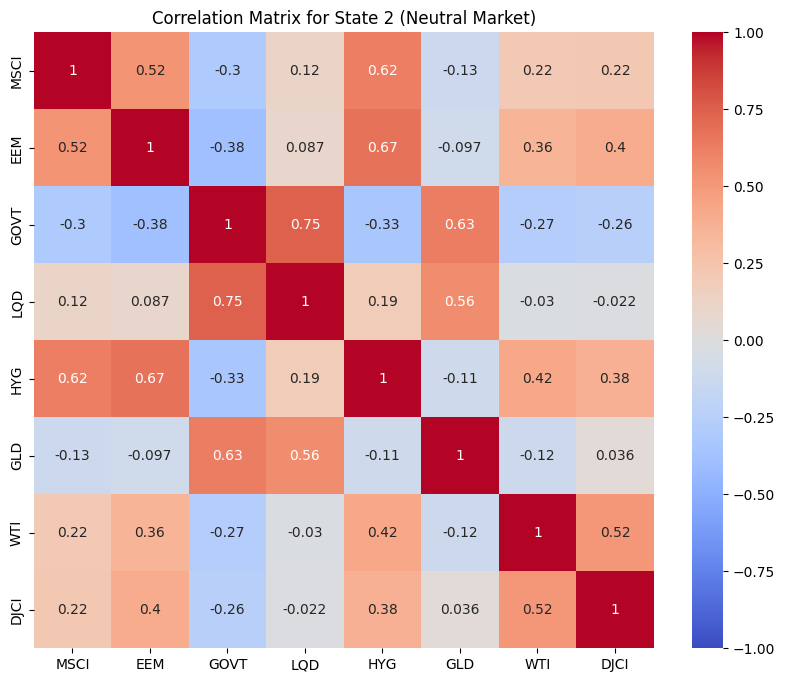

In [ ]:
# calculate covariance matrix & correlation matrix
state_data_dict = {}
cov_matrix_dict = {}
corr_matrix_dict = {}

states = [0, 1, 2]

for state in states:
    # Filter data for each state
    state_data = df[df['state'] == state].drop(columns=['state'])

    # Store the state data, covariance matrix, and correlation matrix in dictionaries
    state_data_dict[state] = state_data
    cov_matrix_dict[state] = state_data.cov()
    corr_matrix_dict[state] = state_data.corr()

# Plot
import seaborn as sns
market_states = ["Bull Market", "Bear Market", "Neutral Market"]

for state, description in zip(states, market_states):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix_dict[state], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix for State {state} ({description})')
    plt.savefig('/content/drive/My Drive/BOA_Capstone/state', format='png')
    plt.show()

In [ ]:
'''
from scipy.optimize import minimize

def objective(weights, cov_matrix):
    # Portfolio variance
    return weights.T @ cov_matrix @ weights

def check_sum(weights):
    # Constraint: Sum of weights is 1
    return np.sum(weights) - 1

# Constraints and bounds
constraints = ({'type':'eq', 'fun': check_sum})
bounds = [(0, 1) for asset in ticker_list]
init_guess = [1./len(ticker_list) for asset in ticker_list]

optimal_weights_by_state = {}

for state in [0, 1, 2]:
#for state in [0, 1]:
    # Filter data for the current state
    df_state = df[df['state'] == state]

    # Calculate daily returns for the filtered data
    returns = df_state[ticker_list].pct_change().dropna()

    # Calculate expected returns and covariance matrix
    expected_returns_state = returns.mean()
    cov_matrix_state = returns.cov()

    # Minimize portfolio variance
    solution = minimize(objective, init_guess, args=(cov_matrix_state), method='SLSQP', bounds=bounds, constraints=constraints)

    # Store the optimal weights for the current state
    optimal_weights_by_state[state] = solution.x

# Print optimal weights for each state
for state, weights in optimal_weights_by_state.items():
    print(f"Optimal weights for state {state}: {weights}")
'''

'\nfrom scipy.optimize import minimize\n\ndef objective(weights, cov_matrix):\n    # Portfolio variance\n    return weights.T @ cov_matrix @ weights\n\ndef check_sum(weights):\n    # Constraint: Sum of weights is 1\n    return np.sum(weights) - 1\n\n# Constraints and bounds\nconstraints = ({\'type\':\'eq\', \'fun\': check_sum})\nbounds = [(0, 1) for asset in ticker_list]\ninit_guess = [1./len(ticker_list) for asset in ticker_list]\n\noptimal_weights_by_state = {}\n\nfor state in [0, 1, 2]:\n#for state in [0, 1]:\n    # Filter data for the current state\n    df_state = df[df[\'state\'] == state]\n\n    # Calculate daily returns for the filtered data\n    returns = df_state[ticker_list].pct_change().dropna()\n\n    # Calculate expected returns and covariance matrix\n    expected_returns_state = returns.mean()\n    cov_matrix_state = returns.cov()\n\n    # Minimize portfolio variance\n    solution = minimize(objective, init_guess, args=(cov_matrix_state), method=\'SLSQP\', bounds=bounds, 

In [ ]:
import cvxpy as cp

def optimize_portfolio(returns, risk_aversion):

    # Number of assets
    n = returns.shape[1]

    # Calculate expected returns and covariance matrix
    r = returns.mean().values
    Sigma = returns.cov().values

    # Portfolio weights
    w = cp.Variable(n)

    # Objective function
    objective = cp.Minimize(cp.quad_form(w, Sigma) - risk_aversion * r.T @ w)

    # Constraints
    constraints = [cp.sum(w) == 1, w >= 0]

    # Define and solve the problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    return w.value

risk_aversion = 1.0
optimal_weights_by_state = {}

# Optimize portfolio based on state data
for state in [0, 1, 2]:
    state_returns = df[df['state'] == state].drop(columns=['state'])
    optimal_weights_by_state[state] = optimize_portfolio(state_returns, risk_aversion)

for state, weights in optimal_weights_by_state.items():
    print(f"Optimal weights for State {state}:", weights)

# Optimize portfolio based on all states data
all_state_returns = df.drop(columns=['state'])
optimal_weights_all_states = optimize_portfolio(all_state_returns, risk_aversion)

print("\nOptimal weights for all states:", optimal_weights_all_states)

Optimal weights for State 0: [ 5.00323194e-01  5.72455861e-23 -6.17670890e-23 -5.18737916e-24
 -2.69999551e-24 -5.32198870e-24  4.99676806e-01 -3.70172014e-24]
Optimal weights for State 1: [ 5.29452219e-01 -1.23741272e-22 -3.66558535e-23  7.72729665e-23
 -2.24977079e-23  4.70547781e-01  1.79057812e-23 -1.41615726e-22]
Optimal weights for State 2: [ 1.00000000e+00  4.79493016e-26 -5.23233893e-25 -4.38112848e-25
  1.10684609e-22  1.10619373e-22  1.40893485e-22 -1.23472335e-25]

Optimal weights for all states: [ 8.75147768e-01 -9.03586974e-23 -1.16034641e-22 -1.10531188e-22
 -1.58845712e-22 -9.20451643e-23  1.24852232e-01 -1.09081583e-22]


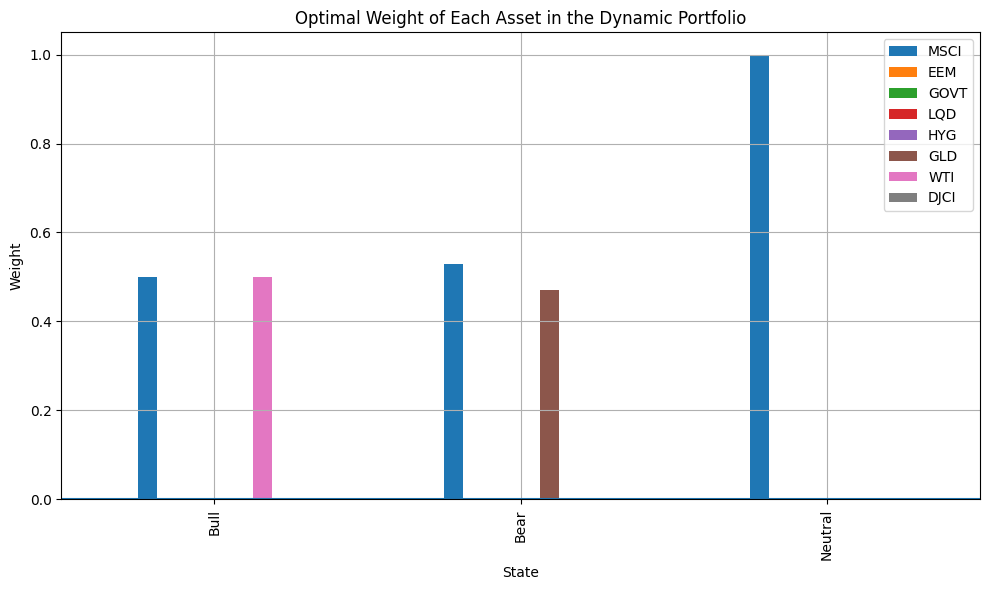

In [ ]:
# Plot optimal weights under different state
index = ['Bull', 'Bear', 'Neutral']
weights = pd.DataFrame(columns = ticker_list, index = index)
optimal_weights = pd.DataFrame(optimal_weights_by_state).T

for i in range(len(index)):
  for j in range(len(ticker_list)):
    weights.iloc[i,j]= optimal_weights.iloc[i,j]

weights.plot(kind='bar', figsize=(10,6))
plt.title('Optimal Weight of Each Asset in the Dynamic Portfolio')
plt.xlabel('State')
plt.ylabel('Weight')
plt.axhline(0)
plt.grid()
plt.tight_layout()
plt.savefig('/content/drive/My Drive/BOA_Capstone/6', format='png')
plt.show()

[*********************100%***********************]  1 of 1 completed


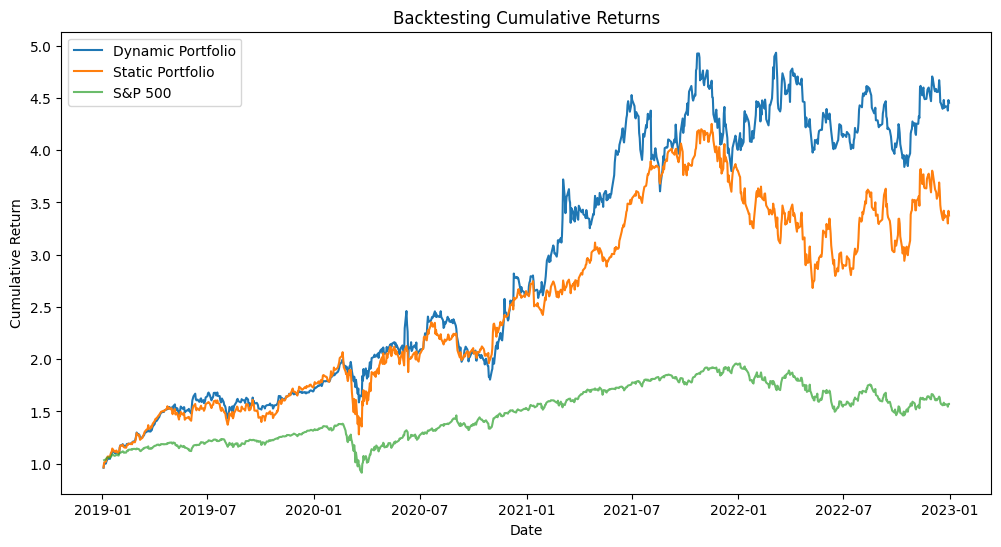

In [ ]:
# Calculate portfolio's daily returns for each state
df['daily_return_dynamic'] = 0
for state, weights in optimal_weights_by_state.items():
    mask = df['state'] == state
    df.loc[mask, 'daily_return_dynamic'] = df[mask][ticker_list].dot(weights)

# Compute the cumulative returns for the dynamic portfolio
df['cum_return_dynamic'] = (1 + df['daily_return_dynamic']).cumprod()

# Compute the cumulative returns for the static portfolio
df['daily_return_static'] = df[ticker_list].dot(optimal_weights_all_states)
df['cum_return_static'] = (1 + df['daily_return_static']).cumprod()

# Compute the cumulative returns for the S&P 500
sp500 = yf.download('^GSPC', start=df.index.min(), end=df.index.max())['Close']
df = pd.merge(df, sp500, left_index=True, right_index=True, how='left')
df.rename(columns={'Close': 'SP500'}, inplace=True)
df['daily_return_SP500'] = df['SP500'].pct_change()
df['cum_return_SP500'] = (1 + df['daily_return_SP500']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cum_return_dynamic'], label='Dynamic Portfolio')
plt.plot(df.index, df['cum_return_static'], label='Static Portfolio')
plt.plot(df.index, df['cum_return_SP500'], label='S&P 500', alpha=0.7)
plt.legend()
plt.title('Backtesting Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.savefig('/content/drive/My Drive/BOA_Capstone/7', format='png')
plt.show()

In [ ]:
# Measure Backtest performance
def calculate_max_drawdown(cumulative_returns):
    """
    Compute the maximum drawdown for a series of cumulative returns.
    """
    # Calculate the running maximum
    running_max = np.maximum.accumulate(cumulative_returns)
    # Calculate the running drawdown
    drawdown = (cumulative_returns - running_max) / running_max
    # Return the maximum drawdown
    return drawdown.min()

# Define risk-free rate
risk_free_rate = 0.0402

# Calculate annualized returns
annualized_return_dynamic = (df['cum_return_dynamic'].iloc[-1]) ** (252.0/len(df)) - 1
annualized_return_static = (df['cum_return_static'].iloc[-1]) ** (252.0/len(df)) - 1
annualized_return_SP500 = (df['cum_return_SP500'].iloc[-1]) ** (252.0/len(df)) - 1

# Calculate annualized volatility
annualized_vol_dynamic = df['daily_return_dynamic'].std() * (252 ** 0.5)
annualized_vol_static = df['daily_return_static'].std() * (252 ** 0.5)
annualized_vol_SP500 = df['daily_return_SP500'].std() * (252 ** 0.5)

# Calculate Sharpe ratios
sharpe_dynamic = (annualized_return_dynamic - risk_free_rate) / annualized_vol_dynamic
sharpe_static = (annualized_return_static - risk_free_rate) / annualized_vol_static
sharpe_SP500 = (annualized_return_SP500 - risk_free_rate) / annualized_vol_SP500

# Calculate downside volatility
downside_vol_dynamic = df[df['daily_return_dynamic'] < 0]['daily_return_dynamic'].std() * (252 ** 0.5)
downside_vol_static = df[df['daily_return_static'] < 0]['daily_return_static'].std() * (252 ** 0.5)
downside_vol_SP500 = df[df['daily_return_SP500'] < 0]['daily_return_SP500'].std() * (252 ** 0.5)

# Calculate Sortino ratios
sortino_dynamic = (annualized_return_dynamic - risk_free_rate) / downside_vol_dynamic
sortino_static = (annualized_return_static - risk_free_rate) / downside_vol_static
sortino_SP500 = (annualized_return_SP500 - risk_free_rate) / downside_vol_SP500

# Calculate Maximum Drawdown
max_drawdown_dynamic = calculate_max_drawdown(df['cum_return_dynamic'])
max_drawdown_static = calculate_max_drawdown(df['cum_return_static'])
max_drawdown_SP500 = calculate_max_drawdown(df['cum_return_SP500'].dropna())

performance_metrics = {
    "Portfolio": ["Dynamic", "Static", "S&P 500"],
    "Annualized Return": [annualized_return_dynamic, annualized_return_static, annualized_return_SP500],
    "Annualized Volatility": [annualized_vol_dynamic, annualized_vol_static, annualized_vol_SP500],
    "Sharpe Ratio": [sharpe_dynamic, sharpe_static, sharpe_SP500],
    "Sortino Ratio": [sortino_dynamic, sortino_static, sortino_SP500],
    "Max Drawdown" : [max_drawdown_dynamic, max_drawdown_static, max_drawdown_SP500]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df = performance_df.round({
    "Annualized Return": 3,
    "Annualized Volatility": 3,
    "Sharpe Ratio": 3,
    "Sortino Ratio": 3,
    "Max Drawdown": 3
})
performance_df

,Portfolio,Annualized Return,Annualized Volatility,Sharpe Ratio,Sortino Ratio,Max Drawdown
0,Dynamic,0.453,0.340,1.214,1.877,-0.267
1,Static,0.356,0.368,0.858,1.198,-0.380
2,S&P 500,0.120,0.229,0.348,0.420,-0.339


## HMM - Detect Regimes based on Volatility MA

In [ ]:
# volatility MA dataframe
df_vol = df_all[['Crude_Oil', 'Gold', 'SP500', 'T30']]

# vol_annual, rolling window = 252 days
from math import sqrt
for col in df_vol.columns:
  df_vol[col] = df_vol[col].pct_change().rolling(252).std()*sqrt(252)
df_vol.dropna(inplace = True)

# add VIX
df_vol = pd.merge(df_vol, df_all['^VIX'], left_index = True, right_index = True)

# add plot-target
df_vol['plot'] = df_all['SP500'].pct_change()
df_vol.dropna(inplace=True)

df_vol.head()

<ipython-input-149-f9f469a7f824>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol[col] = df_vol[col].pct_change().rolling(252).std()*sqrt(252)
<ipython-input-149-f9f469a7f824>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol.dropna(inplace = True)


,Crude_Oil,Gold,SP500,T30,^VIX,plot
date,,,,,,
1998-12-22,0.465143,0.129746,0.201261,0.131616,22.780001,0.000607
1998-12-23,0.466826,0.127692,0.202233,0.130896,20.209999,0.020747
1998-12-24,0.466882,0.127696,0.201910,0.130922,21.480000,-0.001848
1998-12-25,0.466866,0.127417,0.201879,0.130224,21.480000,0.000000
1998-12-28,0.467260,0.127091,0.201671,0.130363,23.500000,-0.000636


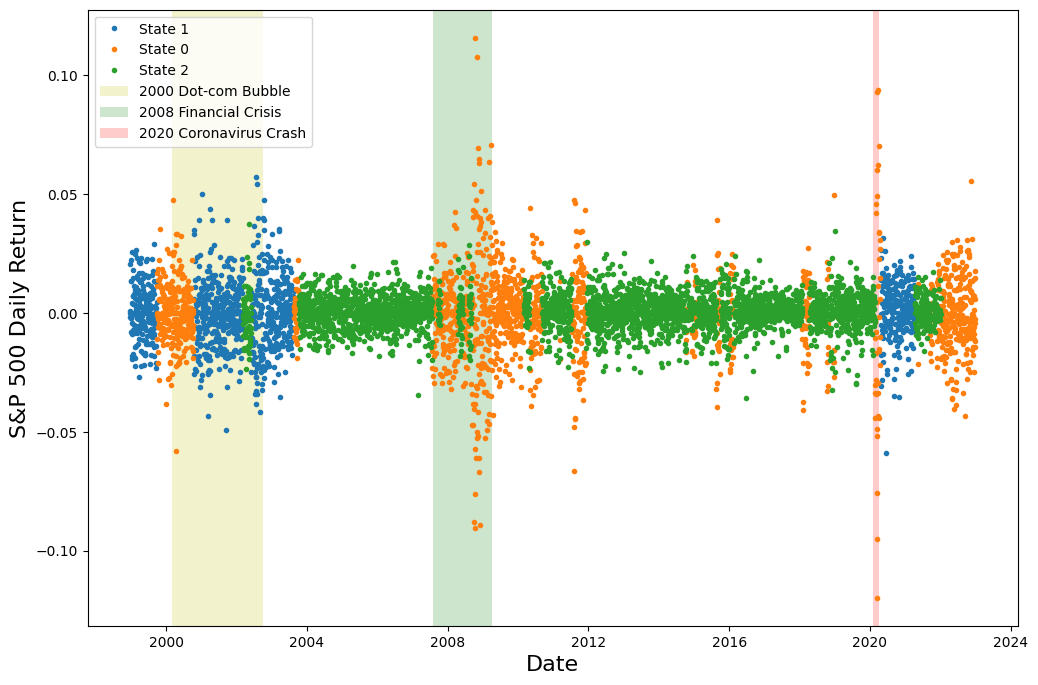

In [ ]:
X = df_vol.drop(columns = ['plot']).to_numpy()

# HMM model with Volatility df
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100, random_state=2)
#model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
model = model.fit(X)
predict = model.predict(X)
states = pd.unique(predict)

# reset index
df_vol.reset_index(inplace = True)

# plot
plt.figure(figsize = (12, 8))
for state in states:
    want = (predict == state)
    x = df_vol['date'].iloc[want]
    y = df_vol['plot'].iloc[want]
    plt.plot(x, y, '.', label = f'State {state}')

plt.axvspan(xmin='2000-03', xmax='2002-10', facecolor="y", alpha=0.2, label='2000 Dot-com Bubble')
plt.axvspan(xmin='2007-08', xmax='2009-04', facecolor="g", alpha=0.2, label='2008 Financial Crisis')
plt.axvspan(xmin='2020-02', xmax='2020-04', facecolor="r", alpha=0.2, label='2020 Coronavirus Crash')

plt.savefig('/content/drive/My Drive/BOA_Capstone/8', format='png')

plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('S&P 500 Daily Return', fontsize=16)
plt.show()

## Backtest: Portfolio Optimization - regime detected by VOLATILITY

In [ ]:
# incorporate 'state' column into the dataframe
df_vol['state'] = np.nan
non_nan_rows = df_price.dropna().index
mask_non_nan = ~df_vol['plot'].isna()
df_vol.loc[mask_non_nan, 'state'] = predict

df_vol = df_vol.set_index('date')
df_vol.head()

<ipython-input-151-bc04685c5a0f>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_vol.loc[mask_non_nan, 'state'] = predict


,Crude_Oil,Gold,SP500,T30,^VIX,plot,state
date,,,,,,,
1998-12-22,0.465143,0.129746,0.201261,0.131616,22.780001,0.000607,1
1998-12-23,0.466826,0.127692,0.202233,0.130896,20.209999,0.020747,1
1998-12-24,0.466882,0.127696,0.201910,0.130922,21.480000,-0.001848,1
1998-12-25,0.466866,0.127417,0.201879,0.130224,21.480000,0.000000,1
1998-12-28,0.467260,0.127091,0.201671,0.130363,23.500000,-0.000636,1


In [ ]:
# merge portfolio dataframe and regime states, drop null values
df = df_p.merge(df_vol['state'], left_index=True, right_index=True, how='left').dropna()

pd.concat([df.head(), df.tail()])

,MSCI,EEM,GOVT,LQD,HYG,GLD,WTI,DJCI,state
Date,,,,,,,,,
2019-01-03,-0.038111,-0.018131,0.005634,0.000442,0.000494,0.009066,-0.013453,0.007540,2
2019-01-04,0.037215,0.032250,-0.005202,-0.000618,0.016784,-0.008086,0.120454,0.011225,2
2019-01-07,0.004639,0.002268,-0.002011,0.000088,0.009710,0.003458,0.050710,0.003756,2
2019-01-08,0.020776,0.003771,-0.002015,0.002209,0.006491,-0.002708,0.011583,0.005637,2
2019-01-09,0.009778,0.017781,0.000000,0.003792,0.001194,0.006418,0.041985,0.013026,2
2022-12-23,0.003245,-0.001321,-0.004350,-0.003073,0.002561,0.002998,0.039927,0.000000,0
2022-12-27,-0.007309,0.014815,-0.005679,-0.012890,-0.010351,0.008430,0.010471,0.000000,0
2022-12-28,-0.013010,-0.014599,-0.001318,-0.003123,-0.013448,-0.004506,-0.056995,0.000000,0
2022-12-29,0.038465,0.016667,0.003080,0.007119,0.012942,0.005598,0.023810,0.000000,0


             MSCI       EEM      GOVT       LQD       HYG       GLD       WTI  \
state                                                                           
HighVol -0.000791 -0.001374 -0.000214 -0.000547 -0.000517  0.000185  0.001683   
LowVol   0.003044  0.000416  0.000231  0.000497  0.000376  0.000641  0.000299   
MidVol   0.001599  0.001761 -0.000195  0.000116  0.000509  0.000164  0.003717   

             DJCI  
state              
HighVol -0.000654  
LowVol   0.000035  
MidVol   0.000815  


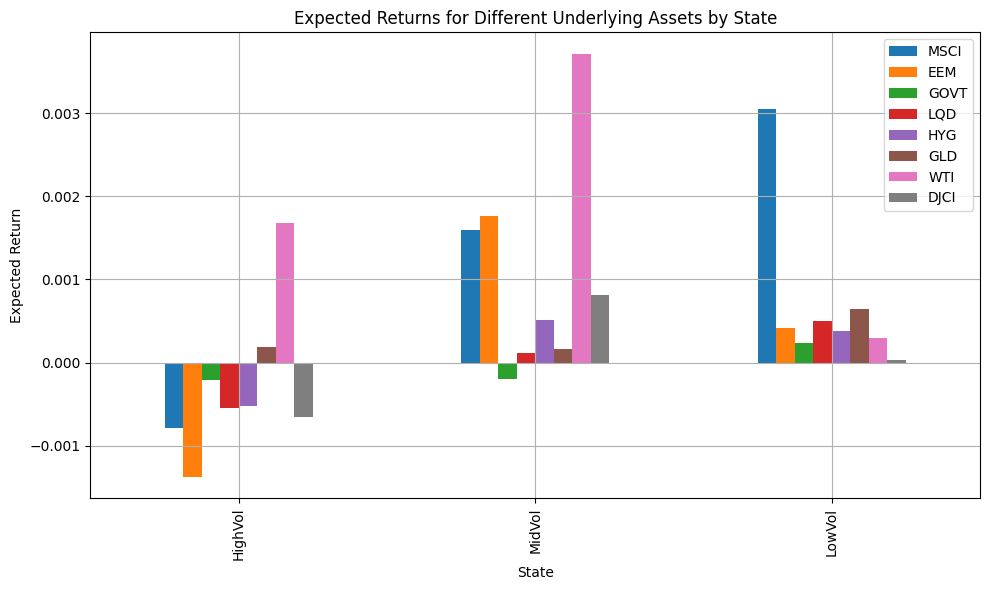

In [ ]:
# Filter for states 0 and 1 (if necessary)
filtered_data = df[df['state'].isin([0, 1, 2])]

# Rename the states in the DataFrame
filtered_data = filtered_data.replace({'state': {0: 'HighVol', 1: 'MidVol', 2: 'LowVol'}})

# Group by 'state' and compute the mean for each group
expected_returns = filtered_data.groupby('state').mean()

print(expected_returns)

# Plot expected returns
ticker_list = ['MSCI', 'EEM', 'GOVT', 'LQD', 'HYG', 'GLD', 'WTI', 'DJCI']

expected_returns_demo = pd.DataFrame({ticker: expected_returns[ticker] for ticker in ticker_list}, index=['HighVol', 'MidVol', 'LowVol'])

expected_returns_demo.plot(kind='bar', figsize=(10, 6))
plt.title('Expected Returns for Different Underlying Assets by State')
plt.xlabel('State')
plt.ylabel('Expected Return')
plt.grid()
plt.tight_layout()
plt.savefig('/content/drive/My Drive/BOA_Capstone/9', format='png')
plt.show()

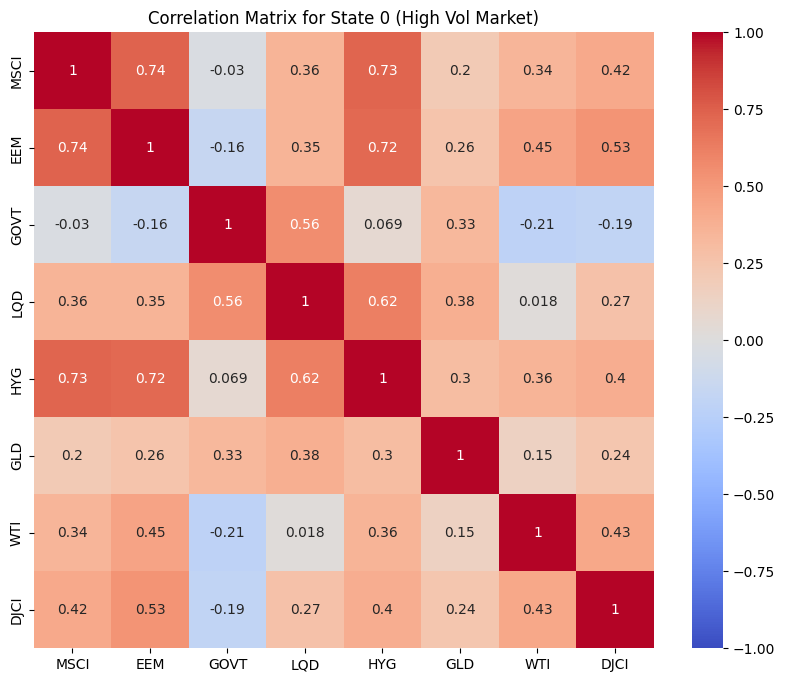

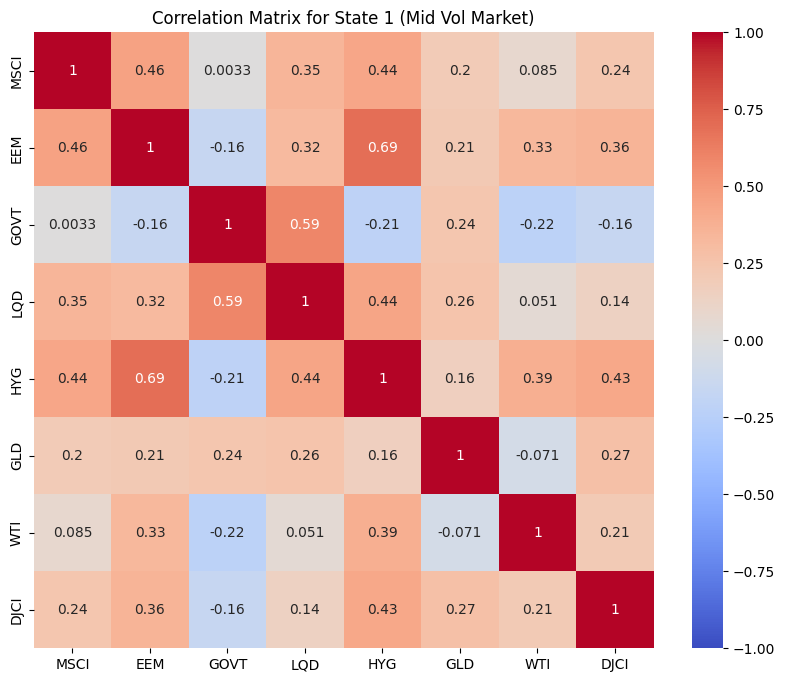

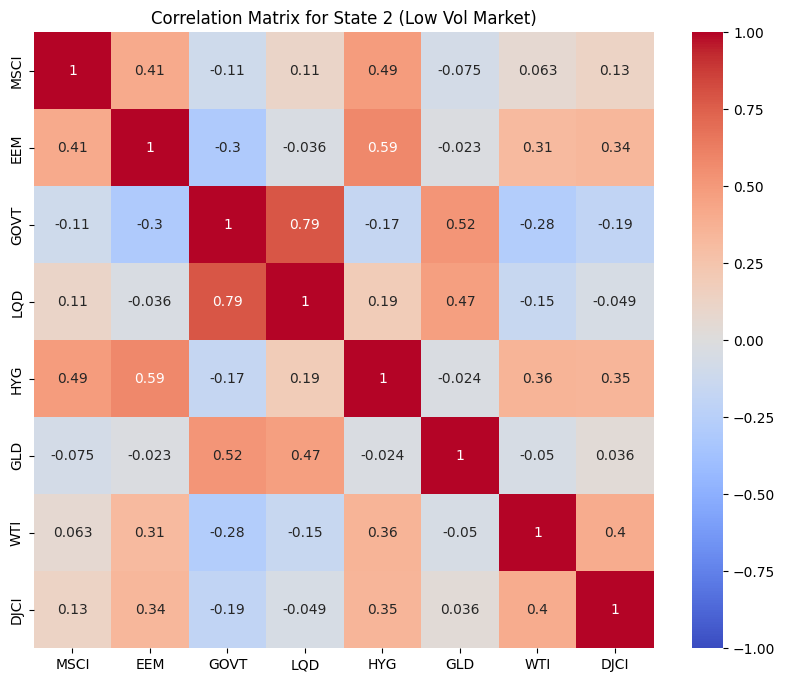

In [ ]:
# calculate covariance matrix & correlation matrix
state_data_dict = {}
cov_matrix_dict = {}
corr_matrix_dict = {}

states = [0, 1, 2]

for state in states:
    # Filter data for each state
    state_data = df[df['state'] == state].drop(columns=['state'])

    # Store the state data, covariance matrix, and correlation matrix in dictionaries
    state_data_dict[state] = state_data
    cov_matrix_dict[state] = state_data.cov()
    corr_matrix_dict[state] = state_data.corr()

# Plot Correlation Heatmap
import seaborn as sns
market_states = ["High Vol Market", "Mid Vol Market", "Low Vol Market"]

for state, description in zip(states, market_states):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix_dict[state], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix for State {state} ({description})')
    plt.savefig('/content/drive/My Drive/BOA_Capstone/state', format='png')
    plt.show()

In [ ]:
'''
from scipy.optimize import minimize

def objective(weights, cov_matrix):
    # Portfolio variance
    return weights.T @ cov_matrix @ weights

def check_sum(weights):
    # Constraint: Sum of weights is 1
    return np.sum(weights) - 1

# Constraints and bounds
constraints = ({'type':'eq', 'fun': check_sum})
bounds = [(0, 1) for asset in ticker_list]
init_guess = [1./len(ticker_list) for asset in ticker_list]

optimal_weights_by_state = {}

for state in [0, 1, 2]:
#for state in [0, 1]:
    # Filter data for the current state
    df_state = df[df['state'] == state]

    # Calculate daily returns for the filtered data
    returns = df_state[ticker_list].pct_change().dropna()

    # Calculate expected returns and covariance matrix
    expected_returns_state = returns.mean()
    cov_matrix_state = returns.cov()

    # Minimize portfolio variance
    solution = minimize(objective, init_guess, args=(cov_matrix_state), method='SLSQP', bounds=bounds, constraints=constraints)

    # Store the optimal weights for the current state
    optimal_weights_by_state[state] = solution.x

# Print optimal weights for each state
for state, weights in optimal_weights_by_state.items():
    print(f"Optimal weights for state {state}: {weights}")
'''

'\nfrom scipy.optimize import minimize\n\ndef objective(weights, cov_matrix):\n    # Portfolio variance\n    return weights.T @ cov_matrix @ weights\n\ndef check_sum(weights):\n    # Constraint: Sum of weights is 1\n    return np.sum(weights) - 1\n\n# Constraints and bounds\nconstraints = ({\'type\':\'eq\', \'fun\': check_sum})\nbounds = [(0, 1) for asset in ticker_list]\ninit_guess = [1./len(ticker_list) for asset in ticker_list]\n\noptimal_weights_by_state = {}\n\nfor state in [0, 1, 2]:\n#for state in [0, 1]:\n    # Filter data for the current state\n    df_state = df[df[\'state\'] == state]\n\n    # Calculate daily returns for the filtered data\n    returns = df_state[ticker_list].pct_change().dropna()\n\n    # Calculate expected returns and covariance matrix\n    expected_returns_state = returns.mean()\n    cov_matrix_state = returns.cov()\n\n    # Minimize portfolio variance\n    solution = minimize(objective, init_guess, args=(cov_matrix_state), method=\'SLSQP\', bounds=bounds, 

In [ ]:
import cvxpy as cp

def optimize_portfolio(returns, risk_aversion):

    # Number of assets
    n = returns.shape[1]

    # Calculate expected returns and covariance matrix
    r = returns.mean().values
    Sigma = returns.cov().values

    # Portfolio weights
    w = cp.Variable(n)

    # Objective function
    objective = cp.Minimize(cp.quad_form(w, Sigma) - risk_aversion * r.T @ w)

    # Constraints
    constraints = [cp.sum(w) == 1, w >= 0]

    # Define and solve the problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    return w.value

risk_aversion = 1.0
optimal_weights_by_state = {}

# Optimize portfolio based on state data
for state in [0, 1, 2]:
    state_returns = df[df['state'] == state].drop(columns=['state'])
    optimal_weights_by_state[state] = optimize_portfolio(state_returns, risk_aversion)

for state, weights in optimal_weights_by_state.items():
    print(f"Optimal weights for State {state}:", weights)

# Optimize portfolio based on all states data
all_state_returns = df.drop(columns=['state'])
optimal_weights_all_states = optimize_portfolio(all_state_returns, risk_aversion)

print("\nOptimal weights for all states:", optimal_weights_all_states)

Optimal weights for State 0: [ 4.09004172e-24 -2.13483168e-22 -3.32600612e-25  1.02106164e-23
  1.13256883e-23  8.12718562e-01  1.87281438e-01  1.35439341e-23]
Optimal weights for State 1: [ 1.39850593e-03  6.48928507e-01  3.36477682e-23 -8.28926830e-23
 -3.74316468e-23  3.27573822e-23  3.49672988e-01  7.33284207e-23]
Optimal weights for State 2: [1.00000000e+00 2.22271771e-22 2.21719431e-22 2.21784154e-22
 1.10840300e-22 2.21935959e-22 1.07768570e-22 1.10978651e-22]

Optimal weights for all states: [ 8.75147768e-01 -9.03586974e-23 -1.16034641e-22 -1.10531188e-22
 -1.58845712e-22 -9.20451643e-23  1.24852232e-01 -1.09081583e-22]


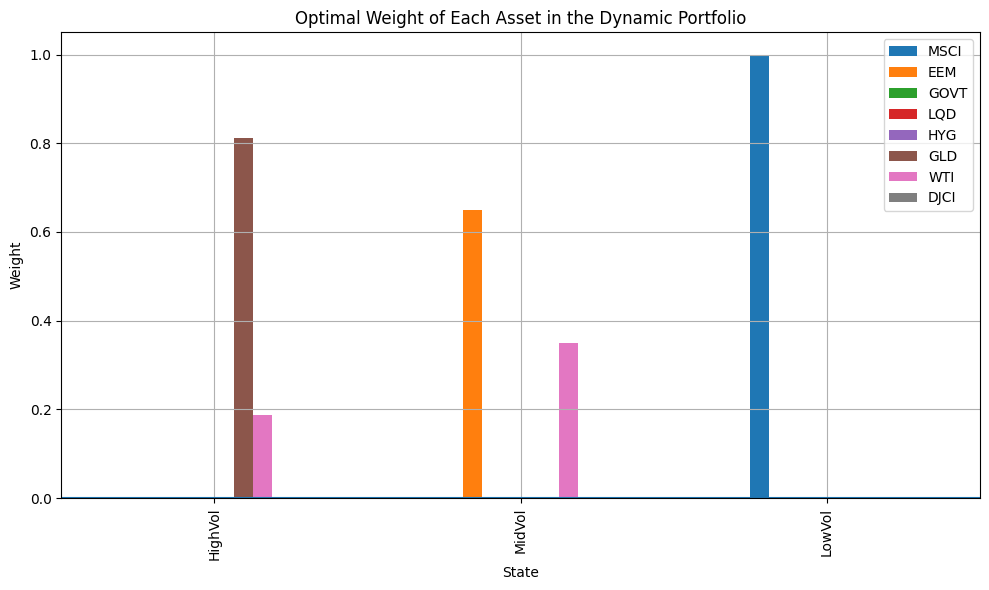

In [ ]:
# Plot optimal weights under different state
index = ['HighVol', 'MidVol', 'LowVol']
weights = pd.DataFrame(columns = ticker_list, index = index)
weights
optimal_weights = pd.DataFrame(optimal_weights_by_state).T

for i in range(len(index)):
  for j in range(len(ticker_list)):
    weights.iloc[i,j]= optimal_weights.iloc[i,j]

weights.plot(kind='bar', figsize=(10,6))
plt.title('Optimal Weight of Each Asset in the Dynamic Portfolio')
plt.xlabel('State')
plt.ylabel('Weight')
plt.axhline(0)
plt.grid()
plt.tight_layout()
plt.savefig('/content/drive/My Drive/BOA_Capstone/13', format='png')
plt.show()

[*********************100%***********************]  1 of 1 completed


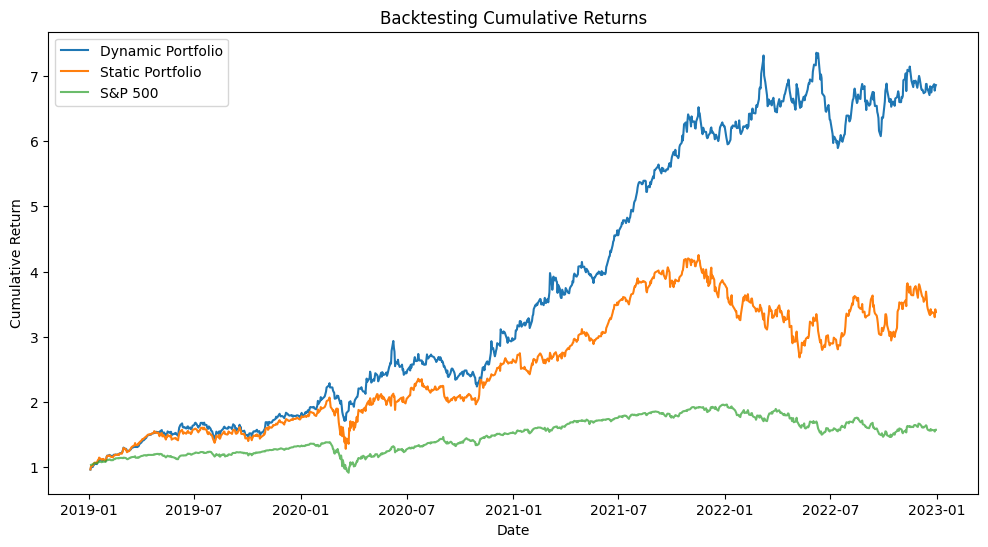

In [ ]:
# Calculate portfolio's daily returns for each state
df['daily_return_dynamic'] = 0
for state, weights in optimal_weights_by_state.items():
    mask = df['state'] == state
    df.loc[mask, 'daily_return_dynamic'] = df[mask][ticker_list].dot(weights)

# Compute the cumulative returns for the dynamic portfolio
df['cum_return_dynamic'] = (1 + df['daily_return_dynamic']).cumprod()

# Compute the cumulative returns for the static portfolio
df['daily_return_static'] = df[ticker_list].dot(optimal_weights_all_states)
df['cum_return_static'] = (1 + df['daily_return_static']).cumprod()

# Compute the cumulative returns for the S&P 500
sp500 = yf.download('^GSPC', start=df.index.min(), end=df.index.max())['Close']
df = pd.merge(df, sp500, left_index=True, right_index=True, how='left')
df.rename(columns={'Close': 'SP500'}, inplace=True)
df['daily_return_SP500'] = df['SP500'].pct_change()
df['cum_return_SP500'] = (1 + df['daily_return_SP500']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cum_return_dynamic'], label='Dynamic Portfolio')
plt.plot(df.index, df['cum_return_static'], label='Static Portfolio')
plt.plot(df.index, df['cum_return_SP500'], label='S&P 500', alpha=0.7)
plt.legend()
plt.title('Backtesting Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.savefig('/content/drive/My Drive/BOA_Capstone/14', format='png')
plt.show()

In [ ]:
# Measure Backtest performance
def calculate_max_drawdown(cumulative_returns):
    """
    Compute the maximum drawdown for a series of cumulative returns.
    """
    # Calculate the running maximum
    running_max = np.maximum.accumulate(cumulative_returns)
    # Calculate the running drawdown
    drawdown = (cumulative_returns - running_max) / running_max
    # Return the maximum drawdown
    return drawdown.min()

# Define risk-free rate
risk_free_rate = 0.0402

# Calculate annualized returns
annualized_return_dynamic = (df['cum_return_dynamic'].iloc[-1]) ** (252.0/len(df)) - 1
annualized_return_static = (df['cum_return_static'].iloc[-1]) ** (252.0/len(df)) - 1
annualized_return_SP500 = (df['cum_return_SP500'].iloc[-1]) ** (252.0/len(df)) - 1

# Calculate annualized volatility
annualized_vol_dynamic = df['daily_return_dynamic'].std() * (252 ** 0.5)
annualized_vol_static = df['daily_return_static'].std() * (252 ** 0.5)
annualized_vol_SP500 = df['daily_return_SP500'].std() * (252 ** 0.5)

# Calculate Sharpe ratios
sharpe_dynamic = (annualized_return_dynamic - risk_free_rate) / annualized_vol_dynamic
sharpe_static = (annualized_return_static - risk_free_rate) / annualized_vol_static
sharpe_SP500 = (annualized_return_SP500 - risk_free_rate) / annualized_vol_SP500

# Calculate downside volatility
downside_vol_dynamic = df[df['daily_return_dynamic'] < 0]['daily_return_dynamic'].std() * (252 ** 0.5)
downside_vol_static = df[df['daily_return_static'] < 0]['daily_return_static'].std() * (252 ** 0.5)
downside_vol_SP500 = df[df['daily_return_SP500'] < 0]['daily_return_SP500'].std() * (252 ** 0.5)

# Calculate Sortino ratios
sortino_dynamic = (annualized_return_dynamic - risk_free_rate) / downside_vol_dynamic
sortino_static = (annualized_return_static - risk_free_rate) / downside_vol_static
sortino_SP500 = (annualized_return_SP500 - risk_free_rate) / downside_vol_SP500

# Calculate Maximum Drawdown
max_drawdown_dynamic = calculate_max_drawdown(df['cum_return_dynamic'])
max_drawdown_static = calculate_max_drawdown(df['cum_return_static'])
max_drawdown_SP500 = calculate_max_drawdown(df['cum_return_SP500'].dropna())

performance_metrics = {
    "Portfolio": ["Dynamic", "Static", "S&P 500"],
    "Annualized Return": [annualized_return_dynamic, annualized_return_static, annualized_return_SP500],
    "Annualized Volatility": [annualized_vol_dynamic, annualized_vol_static, annualized_vol_SP500],
    "Sharpe Ratio": [sharpe_dynamic, sharpe_static, sharpe_SP500],
    "Sortino Ratio": [sortino_dynamic, sortino_static, sortino_SP500],
    "Max Drawdown" : [max_drawdown_dynamic, max_drawdown_static, max_drawdown_SP500]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df = performance_df.round({
    "Annualized Return": 3,
    "Annualized Volatility": 3,
    "Sharpe Ratio": 3,
    "Sortino Ratio": 3,
    "Max Drawdown": 3
})
performance_df

,Portfolio,Annualized Return,Annualized Volatility,Sharpe Ratio,Sortino Ratio,Max Drawdown
0,Dynamic,0.619,0.283,2.047,3.201,-0.253
1,Static,0.356,0.368,0.858,1.198,-0.380
2,S&P 500,0.120,0.229,0.348,0.420,-0.339


**Try** **PCA**



In [ ]:
# Input PCA components !!!
# df_PCA.head()

In [ ]:
# Input PCA components !!!
'''
# Price Return MA with 252D rolling window
for col in df_PCA.columns:
  df_PCA[col] = df_PCA[col].pct_change().rolling(252).median() # use median to make it more robust -> better than mean
df_PCA.dropna(inplace = True)

# add plot-target
df_PCA['plot'] = df_all['Russell3000']
df_PCA.dropna(inplace=True)

# transfer dataframe to array
X = df_PCA.drop(columns = ['plot']).to_numpy()

# HMM model with Price Return df
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)
model = model.fit(X)
predict = model.predict(X)
states = pd.unique(predict)

# reset index
df_PCA.reset_index(inplace = True)

# plot
plt.figure(figsize = (12, 8))
for state in states:
    want = (predict == state)
    x = df_PCA['date'].iloc[want]
    y = df_PCA['plot'].iloc[want]
    plt.plot(x, y, '.')

plt.axvspan(xmin='2000-03', xmax='2002-10', facecolor="y", alpha=0.2, label='2000 Dot-com Bubble')
plt.axvspan(xmin='2007-08', xmax='2009-04', facecolor="g", alpha=0.2, label='2008 Financial Crisis')
plt.axvspan(xmin='2020-02', xmax='2020-04', facecolor="r", alpha=0.2, label='2020 Coronavirus Crash')

plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('PCA Components', fontsize=16)
plt.show()
'''

'\n# Price Return MA with 252D rolling window\nfor col in df_PCA.columns:\n  df_PCA[col] = df_PCA[col].pct_change().rolling(252).median() # use median to make it more robust -> better than mean\ndf_PCA.dropna(inplace = True)\n\n# add plot-target\ndf_PCA[\'plot\'] = df_all[\'Russell3000\']\ndf_PCA.dropna(inplace=True)\n\n# transfer dataframe to array\nX = df_PCA.drop(columns = [\'plot\']).to_numpy()\n\n# HMM model with Price Return df\nmodel = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)\nmodel = model.fit(X)\npredict = model.predict(X)\nstates = pd.unique(predict)\n\n# reset index\ndf_PCA.reset_index(inplace = True)\n\n# plot\nplt.figure(figsize = (12, 8))\nfor state in states:\n    want = (predict == state)\n    x = df_PCA[\'date\'].iloc[want]\n    y = df_PCA[\'plot\'].iloc[want]\n    plt.plot(x, y, \'.\')\n\nplt.axvspan(xmin=\'2000-03\', xmax=\'2002-10\', facecolor="y", alpha=0.2, label=\'2000 Dot-com Bubble\')\nplt.axvspan(xmin=\'2007-08\', xmax=\'2009-04\', f